# Capital Asset Pricing Model

## Milestone 1

In [107]:
%reload_ext dotenv
%dotenv
%matplotlib notebook

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from fredapi import Fred

sns.set()

FRED_API_KEY = os.getenv('FRED_API_KEY')

Download the closing prices of the desired symbols.

In [108]:
stocks_symbols = ['AAPL', 'IBM', 'MSFT', 'INTC', '^GSPC']
stocks = yf.download(stocks_symbols, start='2021-01-01', end='2021-04-01')
stocks = stocks['Close']
stocks = stocks.dropna()
stocks = stocks.rename(columns={'^GSPC': 'GSPC'})
stocks.describe()

[*********************100%***********************]  5 of 5 completed


,AAPL,IBM,INTC,MSFT,GSPC
count,62.000000,62.000000,62.000000,62.000000,62.000000
mean,128.427903,125.195968,59.438226,231.866613,3863.938563
std,6.726222,4.862788,4.248762,9.164177,71.994513
min,116.360001,118.580002,49.669998,212.250000,3700.649902
25%,121.984999,120.754999,57.107501,226.894997,3810.167542
50%,128.315002,124.060001,60.530001,233.525002,3873.589966
75%,133.752502,128.985004,62.827500,237.677505,3915.557556
max,143.160004,136.380005,65.779999,244.990005,3974.540039


Search for risk free rate data in the Federal Reserve Economic Data:

In [109]:
fred = Fred(api_key=FRED_API_KEY)
fred.search('risk free')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
DGS10,DGS10,2021-06-30,2021-06-30,10-Year Treasury Constant Maturity Rate,1962-01-02,2021-06-29,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-06-30 15:23:07-05:00,97,For further information regarding treasury con...
GS10,GS10,2021-06-30,2021-06-30,10-Year Treasury Constant Maturity Rate,1953-04-01,2021-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2021-06-01 15:24:22-05:00,75,Averages of business days. For further informa...
WGS10YR,WGS10YR,2021-06-30,2021-06-30,10-Year Treasury Constant Maturity Rate,1962-01-05,2021-06-25,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2021-06-28 15:21:01-05:00,62,Averages of business days. For further informa...
DGS1,DGS1,2021-06-30,2021-06-30,1-Year Treasury Constant Maturity Rate,1962-01-02,2021-06-29,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-06-30 15:23:16-05:00,79,For further information regarding treasury con...
DGS5,DGS5,2021-06-30,2021-06-30,5-Year Treasury Constant Maturity Rate,1962-01-02,2021-06-29,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-06-30 15:23:03-05:00,78,For further information regarding treasury con...
WGS1YR,WGS1YR,2021-06-30,2021-06-30,1-Year Treasury Constant Maturity Rate,1962-01-05,2021-06-25,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2021-06-28 15:22:01-05:00,57,Averages of business days. For further informa...
GS1,GS1,2021-06-30,2021-06-30,1-Year Treasury Constant Maturity Rate,1953-04-01,2021-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2021-06-01 15:24:43-05:00,51,Averages of business days. For further informa...
DGS30,DGS30,2021-06-30,2021-06-30,30-Year Treasury Constant Maturity Rate,1977-02-15,2021-06-29,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-06-30 15:22:09-05:00,78,Yields on actively traded non-inflation-indexe...
GS5,GS5,2021-06-30,2021-06-30,5-Year Treasury Constant Maturity Rate,1953-04-01,2021-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2021-06-01 15:24:38-05:00,53,Averages of business days. For further informa...


We are interested in `DGS3MO`, as it is a government-issued and widely applicable rate.

In [110]:
risk_free = fred.get_series('DGS3MO')
risk_free = risk_free['2021-01-01':'2021-04-01']

## Milestone 2

The purpose of this milestone is to calculate excess returns. To do that, we need:
- calculate stock returns as percentage
- convert risk free rate to daily value
- subtract each other

But first, some visualizations. Here are the trends of the downloaded stocks:

<IPython.core.display.Javascript object>


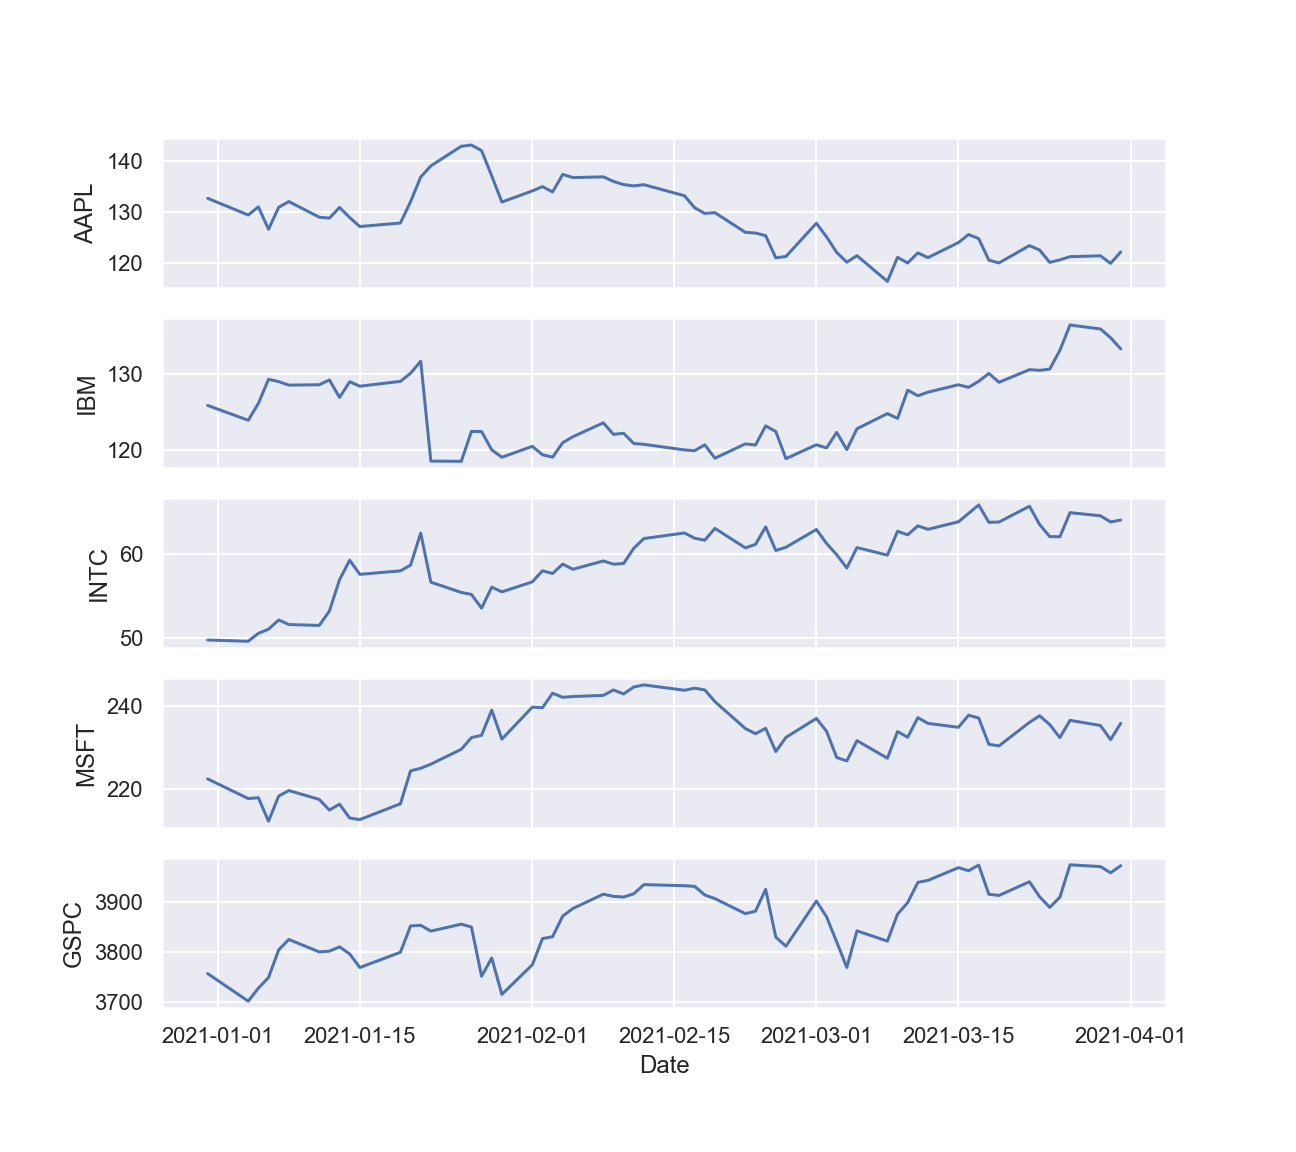

In [115]:
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(9, 8))
for i in range(5):
    sns.lineplot(data=stocks.iloc[:, i], ax=axes[i])

Let's also visualize the correlation between stocks. See how similar are the trends for Intel and SP500. Apple on the other hand is quite different.

<IPython.core.display.Javascript object>


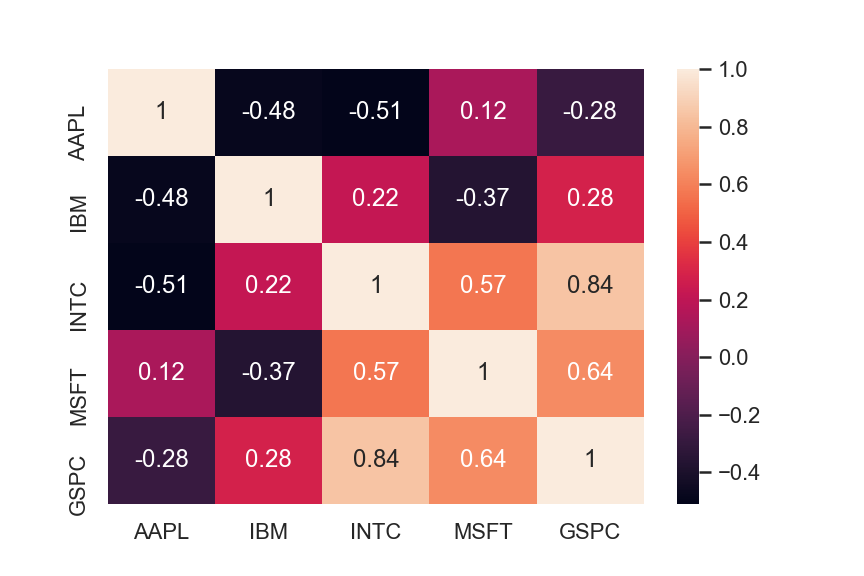

<AxesSubplot:>

In [116]:
sns.heatmap(stocks.corr(), annot=True)

Let's start now start the journey to calculate excess returns. We start with the stock returns. Pandas provide a function `pct_change` to calculate those. We will just need to drop the first value as it will be `NaN` (as it cannot be compared to prior element).

In [126]:
stock_returns = stocks.pct_change()
stock_returns = stock_returns.dropna()
stock_returns

,AAPL,IBM,INTC,MSFT,GSPC
Date,,,,,
2021-01-04,-0.024719,-0.015411,-0.003011,-0.021266,-0.014755
2021-01-05,0.012364,0.017750,0.018925,0.000965,0.007083
2021-01-06,-0.033662,0.024972,0.009682,-0.025929,0.005710
2021-01-07,0.034123,-0.002320,0.021331,0.028457,0.014847
2021-01-08,0.008631,-0.003566,-0.010347,0.006093,0.005492
...,...,...,...,...,...
2021-03-25,0.004164,0.018757,-0.000322,-0.013251,0.005240
2021-03-26,0.005141,0.024874,0.045953,0.017819,0.016631
2021-03-29,0.001485,-0.003813,-0.005704,-0.005244,-0.000868


We've already downloaded `risk_free` data in Milestone 1. It spans over 3 months. Let's make it a daily rate and also delete the last row, because it goes one day over the end of our stocks data.

<IPython.core.display.Javascript object>


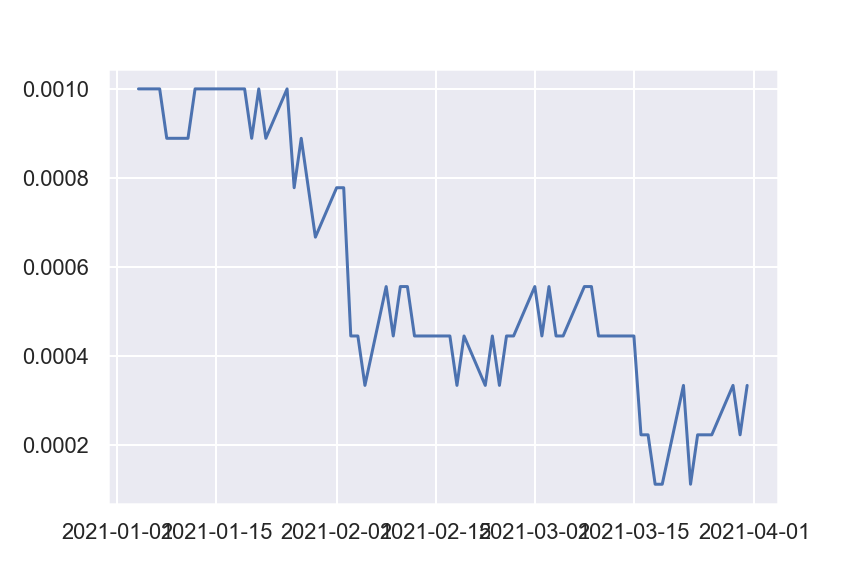

<AxesSubplot:>

In [131]:
risk_free_daily = risk_free / 90
risk_free_daily = risk_free_daily.dropna()
risk_free_daily = risk_free_daily.iloc[:-1]
sns.lineplot(data=risk_free_daily)


In [127]:
excess_returns = stock_returns.sub(risk_free_daily, axis=0)
excess_returns

,AAPL,IBM,INTC,MSFT,GSPC
Date,,,,,
2021-01-04,-0.025719,-0.016411,-0.004011,-0.022266,-0.015755
2021-01-05,0.011364,0.016750,0.017925,-0.000035,0.006083
2021-01-06,-0.034662,0.023972,0.008682,-0.026929,0.004710
2021-01-07,0.033123,-0.003320,0.020331,0.027457,0.013847
2021-01-08,0.007742,-0.004455,-0.011236,0.005204,0.004603
...,...,...,...,...,...
2021-03-25,0.003941,0.018535,-0.000545,-0.013473,0.005018
2021-03-26,0.004919,0.024652,0.045731,0.017596,0.016409
2021-03-29,0.001152,-0.004146,-0.006037,-0.005577,-0.001201


## Useful links

- [Risk Free Rate and Fama French factors](https://bizlib247.wordpress.com/2013/01/18/risk-free-rate-and-fama-french-factors/)

